<a href="https://colab.research.google.com/github/CurlyNikolai/Citybike_ml/blob/main/city_bike_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# City Bike Machine Learning

Welcome to the city bike machine learning project!

In [ ]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures    # function to generate polynomial and interaction features
from sklearn.linear_model import LinearRegression, HuberRegressor    # classes providing Linear Regression with ordinary squared error loss and Huber loss, respectively
from sklearn.metrics import mean_squared_error    
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import ticker
import calendar

In [ ]:
# RUN THIS IF ON GOOGLE COLAB
from google.colab import drive
drive.mount('/content/gdrive')
%cd  gdrive/My Drive/Aalto Game Design/Ml_intro/Citybike_ml
! ls

Mounted at /content/gdrive
/content/gdrive/My Drive/Aalto Game Design/Ml_intro/Citybike_ml
bike_data.csv  city_bike_notebook.ipynb


## The Data

### Read in the data
Let's start of by reading in the data, and taking a little peek of it:

In [ ]:
# Read in data and take a peek 
data = pd.read_csv("bike_data.csv", index_col=0)
pd.set_option("expand_frame_repr", False)
print(data.head)

<bound method NDFrame.head of          Date  Hour  Departures  Returns  Air temperature  Rain amount  Rain intensity  Weekday  Month  Year  Rain intensity class
0       05-01     0         0.0      0.0              5.4          0.0             0.0        6      5  2016                     0
1       05-01     0         0.0      0.0              5.4          0.0             0.0        6      5  2016                     0
2       05-01     0         0.0      0.0              5.5          0.0             0.0        6      5  2016                     0
3       05-01     0         0.0      0.0              5.5          0.0             0.0        6      5  2016                     0
4       05-01     0         0.0      0.0              5.2          0.0             0.0        6      5  2016                     0
...       ...   ...         ...      ...              ...          ...             ...      ...    ...   ...                   ...
132345  07-15     8         9.0     16.0             

### Data visualization

Next, let's visualize the data by plotting the number of departures against most features:

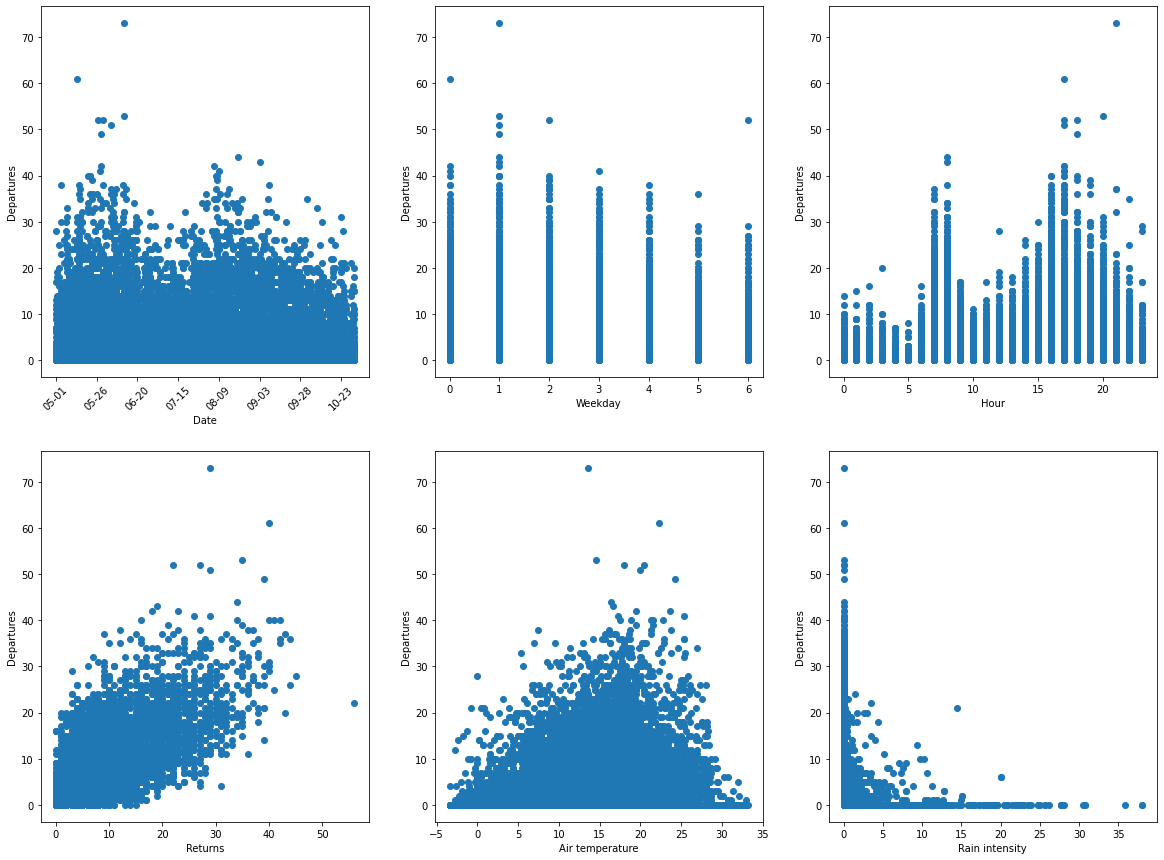

In [ ]:
# Plot departures against Hour, Air temperature, Rain intensity, Weekday
fig, axs = plt.subplots(2, 3)
fig.set_figwidth(20), fig.set_figheight(15)
axs[0, 0].scatter(data.Date, data.Departures)
axs[0, 0].xaxis.set_major_locator(ticker.MaxNLocator(10))
axs[0, 0].set_ylabel("Departures")
axs[0, 0].set_xlabel("Date")
for tick in axs[0, 0].get_xticklabels(): tick.set_rotation(45)
axs[0, 1].scatter(data.Weekday, data.Departures)
axs[0, 1].set_ylabel("Departures")
axs[0, 1].set_xlabel("Weekday")
axs[0, 2].scatter(data.Hour, data.Departures)
axs[0, 2].set_ylabel("Departures")
axs[0, 2].set_xlabel("Hour")
axs[1, 0].scatter(data.Returns, data.Departures)
axs[1, 0].set_ylabel("Departures")
axs[1, 0].set_xlabel("Returns")
axs[1, 1].scatter(data["Air temperature"], data.Departures)
axs[1, 1].set_ylabel("Departures")
axs[1, 1].set_xlabel("Air temperature")
axs[1, 2].scatter(data["Rain intensity"], data.Departures)
axs[1, 2].set_ylabel("Departures")
axs[1, 2].set_xlabel("Rain intensity")
plt.show()

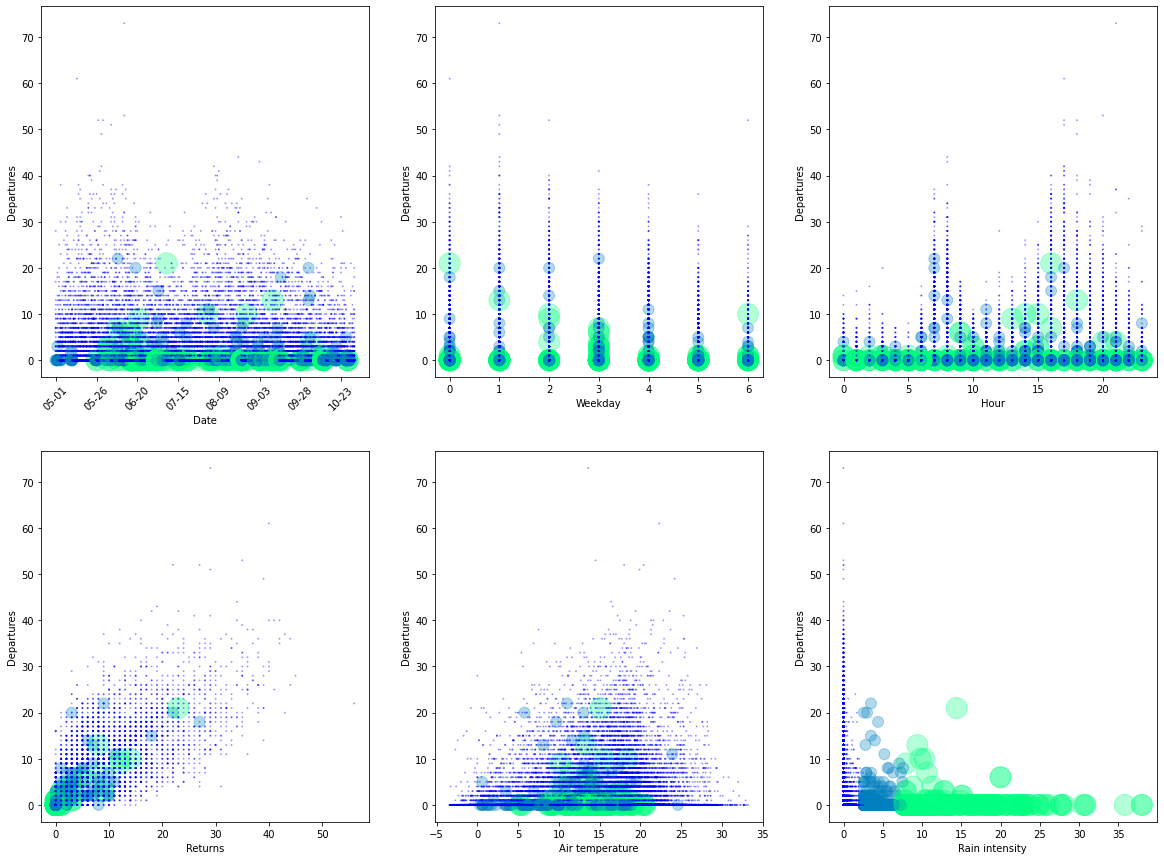

In [ ]:
# Plot departures against Hour, Air temperature, Rain intensity, Weekday
fig, axs = plt.subplots(2, 3)
fig.set_figwidth(20), fig.set_figheight(15)
axs[0, 0].scatter(data.Date, data.Departures, s=100*(data["Rain intensity class"]+0.1)**2, alpha=0.3, c=data["Rain intensity class"], cmap='winter')
axs[0, 0].xaxis.set_major_locator(ticker.MaxNLocator(10))
axs[0, 0].set_ylabel("Departures")
axs[0, 0].set_xlabel("Date")
for tick in axs[0, 0].get_xticklabels(): tick.set_rotation(45)
axs[0, 1].scatter(data.Weekday, data.Departures, s=100*(data["Rain intensity class"]+0.1)**2, alpha=0.3, c=data["Rain intensity class"], cmap='winter')
axs[0, 1].set_ylabel("Departures")
axs[0, 1].set_xlabel("Weekday")
axs[0, 2].scatter(data.Hour, data.Departures, s=100*(data["Rain intensity class"]+0.1)**2, alpha=0.3, c=data["Rain intensity class"], cmap='winter')
axs[0, 2].set_ylabel("Departures")
axs[0, 2].set_xlabel("Hour")
axs[1, 0].scatter(data.Returns, data.Departures, s=100*(data["Rain intensity class"]+0.1)**2, alpha=0.3, c=data["Rain intensity class"], cmap='winter')
axs[1, 0].set_ylabel("Departures")
axs[1, 0].set_xlabel("Returns")
axs[1, 1].scatter(data["Air temperature"], data.Departures, s=100*(data["Rain intensity class"]+0.1)**2, alpha=0.3, c=data["Rain intensity class"], cmap='winter')
axs[1, 1].set_ylabel("Departures")
axs[1, 1].set_xlabel("Air temperature")
axs[1, 2].scatter(data["Rain intensity"], data.Departures, s=100*(data["Rain intensity class"]+0.1)**2, alpha=0.3, c=data["Rain intensity class"], cmap='winter')
axs[1, 2].set_ylabel("Departures")
axs[1, 2].set_xlabel("Rain intensity")
plt.show()


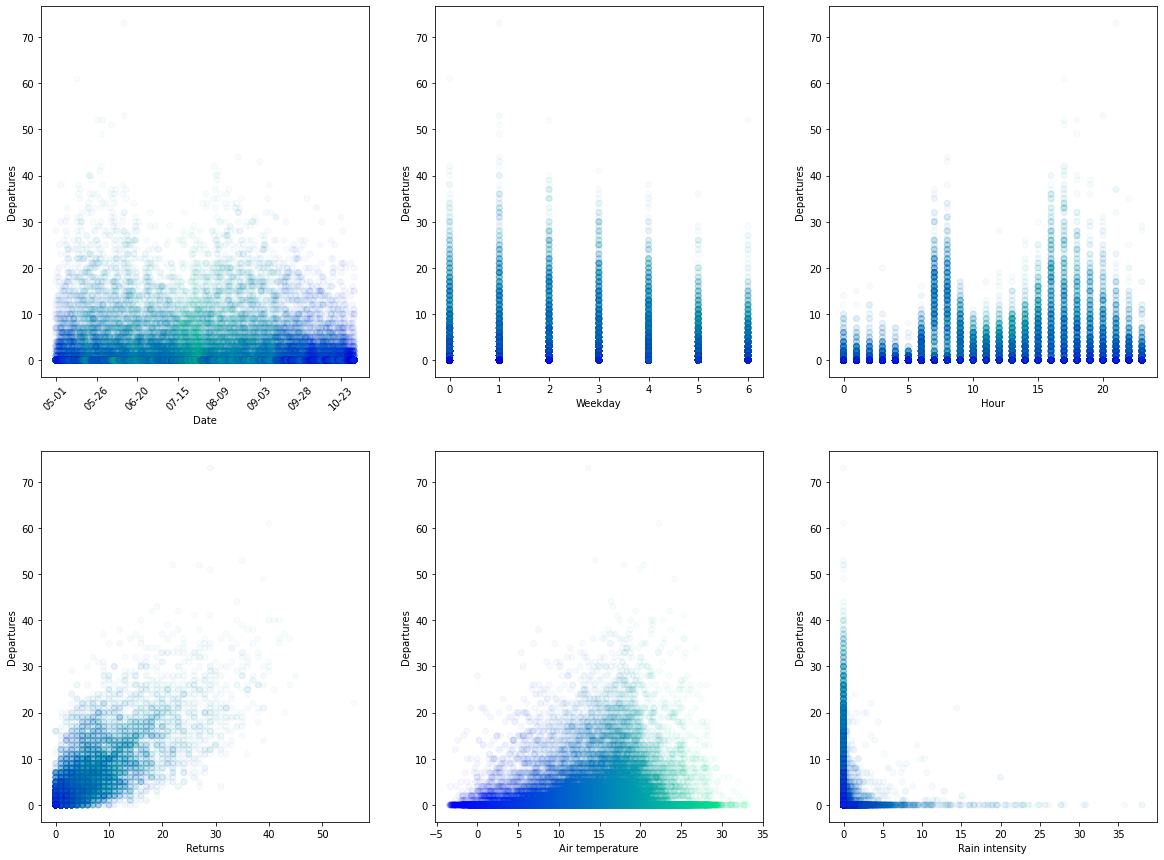

In [ ]:
# Plot departures against Hour, Air temperature, Rain intensity, Weekday
fig, axs = plt.subplots(2, 3)
fig.set_figwidth(20), fig.set_figheight(15)
axs[0, 0].scatter(data.Date, data.Departures, alpha=0.03, c=data["Air temperature"], cmap='winter')
axs[0, 0].xaxis.set_major_locator(ticker.MaxNLocator(10))
axs[0, 0].set_ylabel("Departures")
axs[0, 0].set_xlabel("Date")
for tick in axs[0, 0].get_xticklabels(): tick.set_rotation(45)
axs[0, 1].scatter(data.Weekday, data.Departures, alpha=0.03, c=data["Air temperature"], cmap='winter')
axs[0, 1].set_ylabel("Departures")
axs[0, 1].set_xlabel("Weekday")
axs[0, 2].scatter(data.Hour, data.Departures, alpha=0.03, c=data["Air temperature"], cmap='winter')
axs[0, 2].set_ylabel("Departures")
axs[0, 2].set_xlabel("Hour")
axs[1, 0].scatter(data.Returns, data.Departures, alpha=0.03, c=data["Air temperature"], cmap='winter')
axs[1, 0].set_ylabel("Departures")
axs[1, 0].set_xlabel("Returns")
axs[1, 1].scatter(data["Air temperature"], data.Departures, alpha=0.03, c=data["Air temperature"], cmap='winter')
axs[1, 1].set_ylabel("Departures")
axs[1, 1].set_xlabel("Air temperature")
axs[1, 2].scatter(data["Rain intensity"], data.Departures, alpha=0.03, c=data["Air temperature"], cmap='winter')
axs[1, 2].set_ylabel("Departures")
axs[1, 2].set_xlabel("Rain intensity")
plt.show()

Let's now plot the departures against the hour of day, for every weekday:

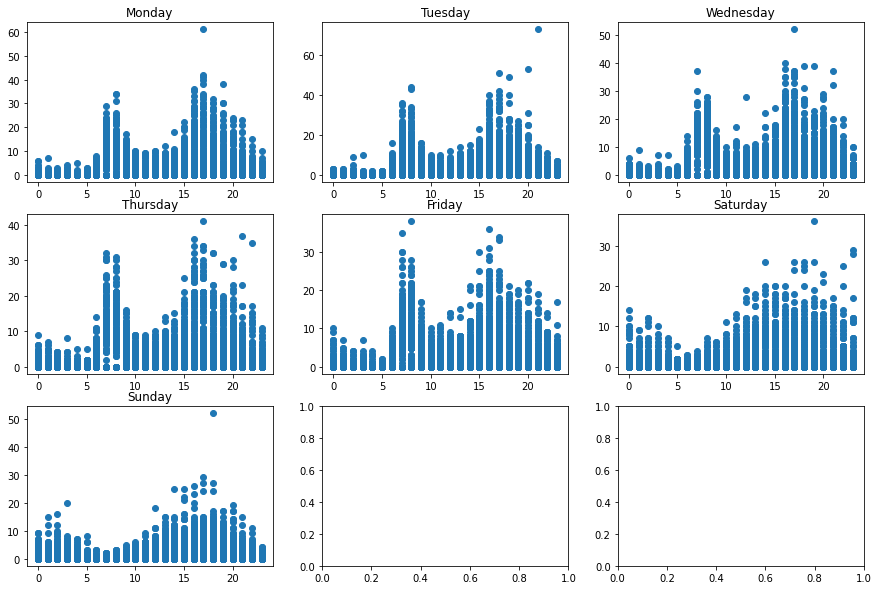

In [ ]:
# Separate data into weekday data
data_weekday = [data[data.Weekday == i] for i in range(7)]

# Plot the departures for every hour, for every weekday
fig, axs = plt.subplots(3,3)
fig.set_figwidth(15); fig.set_figheight(10)
j, k = 0, 0
for i in range(7):
    if k==3: k = 0; j += 1
    axs[j, k].scatter(data_weekday[i].Hour, data_weekday[i].Departures)
    axs[j, k].set_title(list(calendar.day_name)[i])
    k+=1
plt.show()


What's interesting to see in the plot above is that we can clearly distuingish rush hours during the weekdays, and what's even more interesting to see is the little bump in departures during the night at the end of the week 😊


Now let's add a categorized value for the number of departures. We'll split the departures into three new ones: 0) Low activity, 1) Medium activity, and 3) High activity, with intervalls of 0-5, 5-15, and >15 departures, respectively.

In [ ]:
# Categorize departures
departure_categories = [0, 1, 2]
cut_bins = [0, 5, 15, 1000]
categorized_departures = pd.cut(data['Departures'], bins=cut_bins, labels=departure_categories, include_lowest=True)

data["Categorized departures"] = categorized_departures


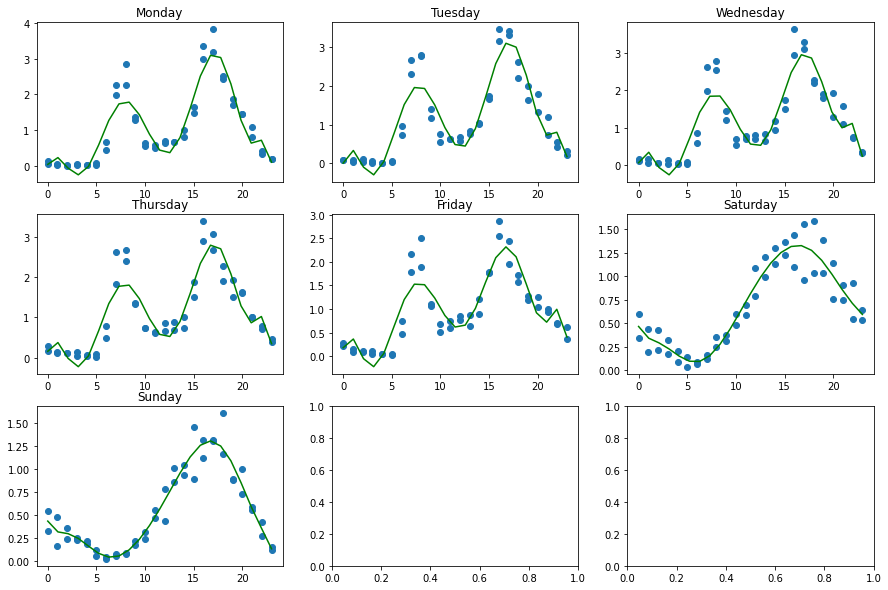

In [ ]:
# Separate data into weekday data
data_weekday = [data[ (data.Weekday == i) & (data.Year>2017) ] for i in range(7)]

fig, axs = plt.subplots(3,3)
fig.set_figwidth(15); fig.set_figheight(10)
j, k = 0, 0

for i in range(7):
    if k==3: k = 0; j += 1
    y = data_weekday[i].groupby(["Hour", "Year"]).Departures.mean().to_numpy()
    X = data_weekday[i].groupby(["Hour", "Year"]).Departures.mean().index.get_level_values(0).to_numpy().reshape(-1, 1)

    poly = PolynomialFeatures(degree=9)
    X_poly = poly.fit_transform(X)
    
    lin_regr = LinearRegression(fit_intercept=False)
    lin_regr.fit(X_poly, y)
    
    y_pred = lin_regr.predict(X_poly)
    tr_error = mean_squared_error(y, y_pred)

    X_fit = np.linspace(0, 23, 23)    # generate samples
    axs[j, k].plot(X_fit, lin_regr.predict(poly.transform(X_fit.reshape(-1, 1))), color="green", label="Model")  

    axs[j, k].scatter(X, y)
    axs[j, k].set_title(list(calendar.day_name)[i])
    k+=1
plt.show()